# **Personal Identity**

Nama  : [Antonius Wisnumurti Sulistyanto](https://www.linkedin.com/in/antonius-wisnumurti-sulistyanto/)

Kelas : DS Batch 33 A

# Understand Data

This data orign from [Kaggle](https://www.kaggle.com/datasets/saurabhbadole/zomato-delivery-operations-analytics-dataset), Delve into the world of food delivery with the Zomato Delivery Dataset. This dataset provides a comprehensive view of delivery operations, including delivery person details, order timestamps, weather conditions, and more.

## Data Dictionary
- ID: Unique identifier for each delivery.
- Delivery_person_ID: Unique identifier for each delivery person.
- Delivery_person_Age: Age of the delivery person.
- Delivery_person_Ratings: Ratings assigned to the delivery person.
- Restaurant_latitude: Latitude of the restaurant.
- Restaurant_longitude: Longitude of the restaurant.
- Delivery_location_latitude: Latitude of the delivery location.
- Delivery_location_longitude: Longitude of the delivery location.
- Order_Date: Date of the order.
- Time_Ordered: Time the order was placed.
- Time_Order_picked: Time the order was picked up for delivery.
- Weather_conditions: Weather conditions at the time of delivery.
- Road_traffic_density: Density of road traffic during delivery.
- Vehicle_condition: Condition of the delivery vehicle.
- Type_of_order: Type of order (e.g., dine-in, takeaway, delivery).
- Type_of_vehicle: Type of vehicle used for delivery.
- Multiple_deliveries: Indicator of whether multiple deliveries were made in the same trip.
- Festival: Indicator of whether the delivery coincided with a festival.
- City: City where the delivery took place.
- Time_taken (min): Time taken for delivery in minutes.

# Bussines Understanding
Zomato as a food delivery company want to anlayzing what kind of factors that were effecting their driver to delivered order. This analysis lead to understanding the factors were impacted to delivery time so bussines team can make baetter decissions to reduce time or make delivery more efficients


# Questions
1. How much percentage of completed order for every vehicle?
2. Average time delivery for each vehcle in metropolitan?
3. Which vehicle that had most take multiple order?
4. Whether traffic, weather, and conditon of vehicle effect delivery time?

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

I have put my dataset in a google drive folder and I need to mount the google drive to access it.

In [ ]:
#set up connection to google drive
from google.colab import drive
drive.mount('/content/drive/')

data_path = '/content/drive/My Drive/Case study/'

Mounted at /content/drive/


# Read Data

## 1. Read data set from csv file

In [ ]:
#load data
data_1 = pd.read_csv(data_path + 'Zomato Dataset.csv')
data_1.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
28146,0x140e,VADRES07DEL01,35.0,4.0,0.000000,0.000000,0.010000,0.010000,26-03-2022,10:35,10:45,Sandstorms,Low,0,Snack,motorcycle,1.0,No,Metropolitian,28
36256,0xbdd4,SURRES18DEL02,31.0,4.5,21.149834,72.778666,21.279834,72.908666,29-03-2022,19:45,0.833333333,Fog,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,45
17200,0x375f,INDORES07DEL03,20.0,5.0,22.722634,75.886959,22.752634,75.916959,15-03-2022,17:25,17:40,Sandstorms,Medium,1,Snack,scooter,0.0,No,Metropolitian,22
43906,0xd4c4,DEHRES17DEL03,31.0,4.5,30.327968,78.046106,30.387968,78.106106,15-02-2022,0.958333333,23:10,Cloudy,Low,2,Snack,motorcycle,0.0,No,Metropolitian,17
5890,0x22b5,BANGRES15DEL02,25.0,4.6,12.975377,77.696664,13.025377,77.746664,21-03-2022,22:15,22:20,Stormy,Low,2,Buffet,motorcycle,1.0,No,Metropolitian,18


## 2. Check data types for every columns

In [ ]:
#info data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

- Total Column are 20 with rows 45583

- All columns have correct data type, except  Order_Date, Time_Orderd, and Time_Order_picked should convert to date

## 3. Check duplicated value in every column

In [ ]:
#check duplicate values
print('Duplicate values is ', data_1.duplicated().sum())

Duplicate values is  0


In [ ]:
#shows all duplicate values
data_1[data_1.duplicated(keep = False)]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)


- There areno duplicated values

## 4. Check miss value in every columns

In [ ]:
#check miss value
miss_value = data_1.isnull().sum().reset_index().rename(columns = {'index':'column', 0:'miss_value'})
miss_value

,column,miss_value
0,ID,0
1,Delivery_person_ID,0
2,Delivery_person_Age,1854
3,Delivery_person_Ratings,1908
4,Restaurant_latitude,0
5,Restaurant_longitude,0
6,Delivery_location_latitude,0
7,Delivery_location_longitude,0
8,Order_Date,0
9,Time_Orderd,1731


- There are lot of missing values in every columns but range of means value only from 200 until less than 2000
- If I have 45k+ rows, percentage of miss valeus in every columns are around less than 5%
- But I will check percentage from every columns later at Data Cleaning section

## 5. Check values doesn't match with column name

In [ ]:
#check values doesn't match with column
list_column = data_1.columns
for x in list_column:
  print(f'-------------------------------{x}-------------------------------')
  jumlah_value = data_1[x].value_counts().sort_index().reset_index()
  display(jumlah_value)

-------------------------------ID-------------------------------


,ID,count
0,0x1000,1
1,0x1001,1
2,0x1002,1
3,0x1003,1
4,0x1004,1
...,...,...
45579,0xffa,1
45580,0xffb,1
45581,0xffc,1
45582,0xffd,1


-------------------------------Delivery_person_ID-------------------------------


,Delivery_person_ID,count
0,AGRRES010DEL01,14
1,AGRRES010DEL02,15
2,AGRRES010DEL03,13
3,AGRRES01DEL01,12
4,AGRRES01DEL02,14
...,...,...
1315,VADRES19DEL02,59
1316,VADRES19DEL03,41
1317,VADRES20DEL01,59
1318,VADRES20DEL02,50


-------------------------------Delivery_person_Age-------------------------------


,Delivery_person_Age,count
0,15.0,38
1,20.0,2136
2,21.0,2153
3,22.0,2194
4,23.0,2086
5,24.0,2210
6,25.0,2174
7,26.0,2159
8,27.0,2150
9,28.0,2179


-------------------------------Delivery_person_Ratings-------------------------------


,Delivery_person_Ratings,count
0,1.0,38
1,2.5,20
2,2.6,22
3,2.7,22
4,2.8,19
5,2.9,19
6,3.0,6
7,3.1,29
8,3.2,29
9,3.3,25


-------------------------------Restaurant_latitude-------------------------------


,Restaurant_latitude,count
0,-30.905562,1
1,-30.902872,2
2,-30.899584,3
3,-30.895817,3
4,-30.893384,1
...,...,...
652,30.899584,41
653,30.899992,38
654,30.902872,32
655,30.905562,37


-------------------------------Restaurant_longitude-------------------------------


,Restaurant_longitude,count
0,-88.366217,1
1,-88.352885,1
2,-88.349843,1
3,-88.322337,1
4,-85.339820,1
...,...,...
513,88.393310,36
514,88.400467,33
515,88.400581,34
516,88.433187,36


-------------------------------Delivery_location_latitude-------------------------------


,Delivery_location_latitude,count
0,0.010000,327
1,0.020000,337
2,0.030000,313
3,0.040000,335
4,0.050000,328
...,...,...
4368,31.039992,3
4369,31.042872,2
4370,31.044057,4
4371,31.045562,4


-------------------------------Delivery_location_longitude-------------------------------


,Delivery_location_longitude,count
0,0.010000,327
1,0.020000,337
2,0.030000,313
3,0.040000,335
4,0.050000,328
...,...,...
4368,88.530581,4
4369,88.543187,4
4370,88.543452,3
4371,88.563187,4


-------------------------------Order_Date-------------------------------


,Order_Date,count
0,01-03-2022,1140
1,01-04-2022,1133
2,02-03-2022,1012
3,02-04-2022,992
4,03-03-2022,1150
5,03-04-2022,1178
6,04-03-2022,980
7,04-04-2022,941
8,05-03-2022,1154
9,05-04-2022,1156


-------------------------------Time_Orderd-------------------------------


,Time_Orderd,count
0,0.375,177
1,0.416666667,211
2,0.458333333,193
3,0.5,189
4,0.541666667,79
...,...,...
171,23:35,422
172,23:40,419
173,23:45,405
174,23:50,393


-------------------------------Time_Order_picked-------------------------------


,Time_Order_picked,count
0,0.375,201
1,0.416666667,194
2,0.458333333,148
3,0.5,188
4,0.541666667,83
...,...,...
188,23:50,453
189,23:55,404
190,24:05:00,435
191,24:10:00,280


-------------------------------Weather_conditions-------------------------------


,Weather_conditions,count
0,Cloudy,7533
1,Fog,7653
2,Sandstorms,7494
3,Stormy,7584
4,Sunny,7282
5,Windy,7422


-------------------------------Road_traffic_density-------------------------------


,Road_traffic_density,count
0,High,4423
1,Jam,14139
2,Low,15476
3,Medium,10945


-------------------------------Vehicle_condition-------------------------------


,Vehicle_condition,count
0,0,15005
1,1,15028
2,2,15031
3,3,520


-------------------------------Type_of_order-------------------------------


,Type_of_order,count
0,Buffet,11277
1,Drinks,11321
2,Meal,11456
3,Snack,11530


-------------------------------Type_of_vehicle-------------------------------


,Type_of_vehicle,count
0,bicycle,68
1,electric_scooter,3814
2,motorcycle,26429
3,scooter,15273


-------------------------------multiple_deliveries-------------------------------


,multiple_deliveries,count
0,0.0,14094
1,1.0,28151
2,2.0,1985
3,3.0,361


-------------------------------Festival-------------------------------


,Festival,count
0,No,44460
1,Yes,896


-------------------------------City-------------------------------


,City,count
0,Metropolitian,34087
1,Semi-Urban,164
2,Urban,10133


-------------------------------Time_taken (min)-------------------------------


,Time_taken (min),count
0,10,750
1,11,757
2,12,746
3,13,716
4,14,739
5,15,1810
6,16,1706
7,17,1696
8,18,1765
9,19,1824


- On Time_Orderd, and Time_Order_picked there are values that doesn't match with column, so We will conduxt anlyze before drop/replace

## 6. Descriptive Statistic

In [ ]:
#descriptive statistic for numerical type
descriptive_numerical = data_1.describe()
descriptive_numerical

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


- Restaurant_latitude,	Restaurant_longitude,	Delivery_location_latitude,	Delivery_location_longitude, and	Vehicle_condition	have numerical values but it doesn't mean can be using for calculated because values in this columns use just for location, and condition
- Delivery_person_Age,	Delivery_person_Ratings, and Time_taken (min) have symetrical distribution, becasue mean and median value is not have huge gap

In [ ]:
#descriptive statistic for categorical type
descriptive_categorical = data_1.describe(include='object').T
descriptive_categorical

,count,unique,top,freq
ID,45584,45584,0x2bed,1
Delivery_person_ID,45584,1320,PUNERES01DEL01,67
Order_Date,45584,44,15-03-2022,1192
Time_Orderd,43853,176,21:55,461
Time_Order_picked,45584,193,21:30,495
Weather_conditions,44968,6,Fog,7653
Road_traffic_density,44983,4,Low,15476
Type_of_order,45584,4,Snack,11530
Type_of_vehicle,45584,4,motorcycle,26429
Festival,45356,2,No,44460


- Most of delivered happens in Metropolitan City
- Most of driver using motorcyle for delivering
- Fog became the most weather that happen during delivering

# Data Cleaning

## 1. Alter Data type

In [ ]:
#check data type
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

- We will alter data type Order_Date into datetime

### Order Date

In [ ]:
#alter data type column Order_Date
data_1['Order_Date'] = pd.to_datetime(data_1['Order_Date'], dayfirst = True, errors = 'coerce')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45584 non-null  object        
 1   Delivery_person_ID           45584 non-null  object        
 2   Delivery_person_Age          43730 non-null  float64       
 3   Delivery_person_Ratings      43676 non-null  float64       
 4   Restaurant_latitude          45584 non-null  float64       
 5   Restaurant_longitude         45584 non-null  float64       
 6   Delivery_location_latitude   45584 non-null  float64       
 7   Delivery_location_longitude  45584 non-null  float64       
 8   Order_Date                   45584 non-null  datetime64[ns]
 9   Time_Orderd                  43853 non-null  object        
 10  Time_Order_picked            45584 non-null  object        
 11  Weather_conditions           44968 non-nu

In [ ]:
#check satistic Order_Date column
data_1['Order_Date'].describe()

,Order_Date
count,45584
mean,2022-03-13 16:31:17.711477760
min,2022-02-11 00:00:00
25%,2022-03-04 00:00:00
50%,2022-03-15 00:00:00
75%,2022-03-27 00:00:00
max,2022-04-06 00:00:00


- Data type of Date have been altered to datetime

- First record transaction happen in 11 February 2022 and ended in 6 April 2022, +/- 2 months

###Time Order

In [ ]:
#formula for alter time
col = 'Time_Orderd'

# 1) Normalize the raw strings
s = (data_1[col]
    .astype(str)
    .str.strip()
    .replace({'': np.nan, 'nan': np.nan, 'NaN': np.nan}))

# 2) Split into numeric-like vs non-numeric-like
num = pd.to_numeric(s, errors='coerce')        # Excel-style fractions (as strings) -> float, else NaN
str_time = s[num.isna()]                       # the remaining are clock-time strings

# 3) Fix common string-time issues
#    - "24:xx:xx" is invalid; roll it to "00:xx:xx"
#    - add seconds if missing (e.g. "23:50" -> "23:50:00")
str_time = (str_time
           .str.replace(r'^\s*24:', '00:', regex=True)
           .str.replace(r'^(\d{1,2}:\d{2})$', r'\1:00', regex=True))

# 4) Parse both groups
parsed_num = pd.to_timedelta(num, unit='D')                             # Timedelta since midnight
parsed_str = pd.to_datetime(str_time, format='%H:%M:%S', errors='coerce')  # Datetime
parsed_str = parsed_str - parsed_str.dt.normalize()                     # -> Timedelta since midnight

# 5) Combine back into one clean timedelta column (best for calculations)
clean_td = pd.Series(index=s.index, dtype='timedelta64[ns]')
clean_td.loc[num.notna()] = parsed_num.loc[num.notna()]
clean_td.loc[str_time.index] = parsed_str

In [ ]:
# 6) Make a display-friendly time-of-day column + keep timedelta for math
ref = pd.Timestamp('2000-01-01')  # any fixed date works

# If you want to be extra safe in case anything is >= 1 day, fold it into 24h:
clean_td_24h = clean_td % pd.Timedelta(days=1)

data_1[f'{col}_time'] = (ref + clean_td_24h).dt.time   # pure time objects
data_1[f'{col}_td']   = clean_td                        # keep original timedelta for calculations

###Time Order Picked

In [ ]:
#formula for alter time
col = 'Time_Order_picked'

# 1) Normalize the raw strings
s = (data_1[col]
    .astype(str)
    .str.strip()
    .replace({'': np.nan, 'nan': np.nan, 'NaN': np.nan}))

# 2) Split into numeric-like vs non-numeric-like
num = pd.to_numeric(s, errors='coerce')        # Excel-style fractions (as strings) -> float, else NaN
str_time = s[num.isna()]                       # the remaining are clock-time strings

# 3) Fix common string-time issues
#    - "24:xx:xx" is invalid; roll it to "00:xx:xx"
#    - add seconds if missing (e.g. "23:50" -> "23:50:00")
str_time = (str_time
           .str.replace(r'^\s*24:', '00:', regex=True)
           .str.replace(r'^(\d{1,2}:\d{2})$', r'\1:00', regex=True))

# 4) Parse both groups
parsed_num = pd.to_timedelta(num, unit='D')                             # Timedelta since midnight
parsed_str = pd.to_datetime(str_time, format='%H:%M:%S', errors='coerce')  # Datetime
parsed_str = parsed_str - parsed_str.dt.normalize()                     # -> Timedelta since midnight

# 5) Combine back into one clean timedelta column (best for calculations)
clean_td = pd.Series(index=s.index, dtype='timedelta64[ns]')
clean_td.loc[num.notna()] = parsed_num.loc[num.notna()]
clean_td.loc[str_time.index] = parsed_str

In [ ]:
# 6) Make a display-friendly time-of-day column + keep timedelta for math
ref = pd.Timestamp('2000-01-01')  # any fixed date works

# If you want to be extra safe in case anything is >= 1 day, fold it into 24h:
clean_td_24h = clean_td % pd.Timedelta(days=1)

data_1[f'{col}_time'] = (ref + clean_td_24h).dt.time   # pure time objects
data_1[f'{col}_td']   = clean_td                        # keep original timedelta for calculations

## 2. Drop column that not use for future analysis

In [ ]:
#drop column that not using in future anylsis
data_1 = data_1.drop(['Time_Order_picked', 'Time_Orderd'], axis=1)

In [ ]:
#check new info data_usa
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           45584 non-null  object         
 1   Delivery_person_ID           45584 non-null  object         
 2   Delivery_person_Age          43730 non-null  float64        
 3   Delivery_person_Ratings      43676 non-null  float64        
 4   Restaurant_latitude          45584 non-null  float64        
 5   Restaurant_longitude         45584 non-null  float64        
 6   Delivery_location_latitude   45584 non-null  float64        
 7   Delivery_location_longitude  45584 non-null  float64        
 8   Order_Date                   45584 non-null  datetime64[ns] 
 9   Weather_conditions           44968 non-null  object         
 10  Road_traffic_density         44983 non-null  object         
 11  Vehicle_condition           

- We were dicided to dropped 2 columns Time Order, and Time Order Picked because We have new column with same values but with right type of data

## 3. Handle Missing Values

In [ ]:
#shows percentage of missing values in every columns
total_rows = len(data_1)

for column in data_1.columns:
    missing_count = data_1[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column: '{column}', miss values: {missing_count}, total percentage: ({missing_percentage:.2f}%)")

Column: 'ID', miss values: 0, total percentage: (0.00%)
Column: 'Delivery_person_ID', miss values: 0, total percentage: (0.00%)
Column: 'Delivery_person_Age', miss values: 1854, total percentage: (4.07%)
Column: 'Delivery_person_Ratings', miss values: 1908, total percentage: (4.19%)
Column: 'Restaurant_latitude', miss values: 0, total percentage: (0.00%)
Column: 'Restaurant_longitude', miss values: 0, total percentage: (0.00%)
Column: 'Delivery_location_latitude', miss values: 0, total percentage: (0.00%)
Column: 'Delivery_location_longitude', miss values: 0, total percentage: (0.00%)
Column: 'Order_Date', miss values: 0, total percentage: (0.00%)
Column: 'Weather_conditions', miss values: 616, total percentage: (1.35%)
Column: 'Road_traffic_density', miss values: 601, total percentage: (1.32%)
Column: 'Vehicle_condition', miss values: 0, total percentage: (0.00%)
Column: 'Type_of_order', miss values: 0, total percentage: (0.00%)
Column: 'Type_of_vehicle', miss values: 0, total percent

- Every columns have missing values, range 200 - 1900. It's less than 5%
- I will replace miss values columns Delivery_person_Age with mode
- For Delivery_person_Ratings We will keep miss values because there are customers who's not gave rating
- Replace miss values columns Weather_conditions with mode
- For this column multiple_deliveries We will replace it with median
- Column Festival with mode values
- For City column We will replace it with mode
- For both column Time_Orderd_time, and Time_Orderd_td We will dropped from one of column because both have similarity

In [ ]:
#replace miss values with median and mode
list_column_miss = ['Delivery_person_Age',
    'Weather_conditions',
    'Road_traffic_density',
    'multiple_deliveries',
    'Festival',
    'City',
    'Time_Orderd_time',
    'Time_Orderd_td'
]
for col in list_column_miss:
    if data_1[col].dtype == 'object':
       data_1[col].fillna(data_1[col].mode()[0], inplace=True)
    elif data_1[col].dtype == 'datetime64[ns]':
       data_1[col].fillna(data_1[col].median(), inplace=True)
    else:
       data_1[col].fillna(data_1[col].median(), inplace=True)

/tmp/ipython-input-252266709.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_1[col].fillna(data_1[col].median(), inplace=True)
/tmp/ipython-input-252266709.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
#check miss values
data_1.isnull().sum()

,0
ID,0
Delivery_person_ID,0
Delivery_person_Age,0
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Weather_conditions,0


- All missing values are already gone except Delivery_person_Ratings

##Filter data by Metropolitan

In [ ]:
#percentage of order completed by type of vehicle
ride_percentage = data_1.groupby(['City'])['Delivery_person_ID'].count().reset_index()
ride_percentage['Percentage'] = ((ride_percentage['Delivery_person_ID']/ride_percentage['Delivery_person_ID'].sum())*100).round(2)
ride_percentage.columns = ['City', 'Total Order', 'Percentage']
ride_percentage.sort_values('Percentage', ascending = False)

,City,Total Order,Percentage
0,Metropolitian,35287,77.41
2,Urban,10133,22.23
1,Semi-Urban,164,0.36


- As We can see right here, Metropolitan is the most city that had big amount of order than other City
- So We will shift our focus on Metropolitan

In [ ]:
#filter data only Metropolitan
data_metropolitan = data_1[data_1['City'] == 'Metropolitian']
data_metropolitan.sample(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Time_Orderd_time,Time_Orderd_td,Time_Order_picked_time,Time_Order_picked_td
1024,0x6371,RANCHIRES14DEL01,32.0,4.5,0.000000,0.000000,0.040000,0.040000,2022-03-30,Cloudy,High,0,Meal,motorcycle,1.0,No,Metropolitian,25,12:20:00,0 days 12:20:00,12:30:00,0 days 12:30:00
1270,0x1458,MUMRES19DEL03,29.0,4.7,19.131141,72.813074,19.191140,72.873074,2022-04-03,Windy,Low,1,Drinks,motorcycle,1.0,No,Metropolitian,14,23:45:00,0 days 23:45:00,00:00:00,1 days 00:00:00
19542,0xa236,RANCHIRES05DEL03,33.0,4.6,23.355164,85.324097,23.445164,85.414097,2022-03-25,Fog,Jam,2,Drinks,scooter,0.0,No,Metropolitian,42,20:40:00,0 days 20:40:00,20:50:00,0 days 20:50:00


# Analyze
- We will be analyze based on my bussines questions to get inital insight, and visualization before make and dashboard on Power BI

In [ ]:
data_metropolitan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35287 entries, 0 to 45583
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           35287 non-null  object         
 1   Delivery_person_ID           35287 non-null  object         
 2   Delivery_person_Age          35287 non-null  float64        
 3   Delivery_person_Ratings      33787 non-null  float64        
 4   Restaurant_latitude          35287 non-null  float64        
 5   Restaurant_longitude         35287 non-null  float64        
 6   Delivery_location_latitude   35287 non-null  float64        
 7   Delivery_location_longitude  35287 non-null  float64        
 8   Order_Date                   35287 non-null  datetime64[ns] 
 9   Weather_conditions           35287 non-null  object         
 10  Road_traffic_density         35287 non-null  object         
 11  Vehicle_condition            3528

##1. Percentage of order completed by type of vehicle

In [ ]:
#percentage of order completed by type of vehicle
ride_percentage = data_metropolitan.groupby(['Type_of_vehicle'])['Delivery_person_ID'].count().reset_index()
ride_percentage['Percentage'] = ((ride_percentage['Delivery_person_ID']/ride_percentage['Delivery_person_ID'].sum())*100).round(2)
ride_percentage.columns = ['Type of Vehicle', 'Total Order', 'Percentage']
ride_percentage.sort_values('Percentage', ascending = False)

,Type of Vehicle,Total Order,Percentage
2,motorcycle,20697,58.65
3,scooter,11599,32.87
1,electric_scooter,2936,8.32
0,bicycle,55,0.16


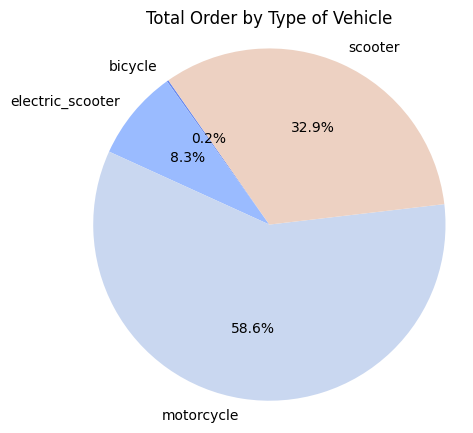

In [ ]:
#visualize percentage of type of ride
plt.figure(figsize = (5,5))
plt.pie(ride_percentage['Percentage'],
        labels = ride_percentage['Type of Vehicle'],
        autopct = '%1.1f%%',
        startangle = 125,
        colors = sns.color_palette('coolwarm'))
plt.title('Total Order by Type of Vehicle')
plt.axis('equal')
plt.show()

- Motorcycle became the most using of vehicle that our company used, with 58%
- Bicycle only have 0.2%, whic is very small amount than others
- Scooter sat down at seccond place after motorcycle with 33%, not quite far from motorcycle
- Electric Scooter have 8.3%, becama number three

## 2. Average minutes for every type of vehicle in Mertropolitan

In [ ]:
#average minutes for each ride in different city
type_minutes = (
    data_metropolitan
      .groupby(['Type_of_vehicle'], as_index = False)
      .agg(
        Total_minutes = ('Time_taken (min)', 'sum'),
        Avg_minutes = ('Time_taken (min)', 'mean')
        )
        .sort_values(by = 'Type_of_vehicle', ascending = False)
)
type_minutes

,Type_of_vehicle,Total_minutes,Avg_minutes
3,scooter,295352,25.463574
2,motorcycle,586420,28.333575
1,electric_scooter,74239,25.285763
0,bicycle,1527,27.763636


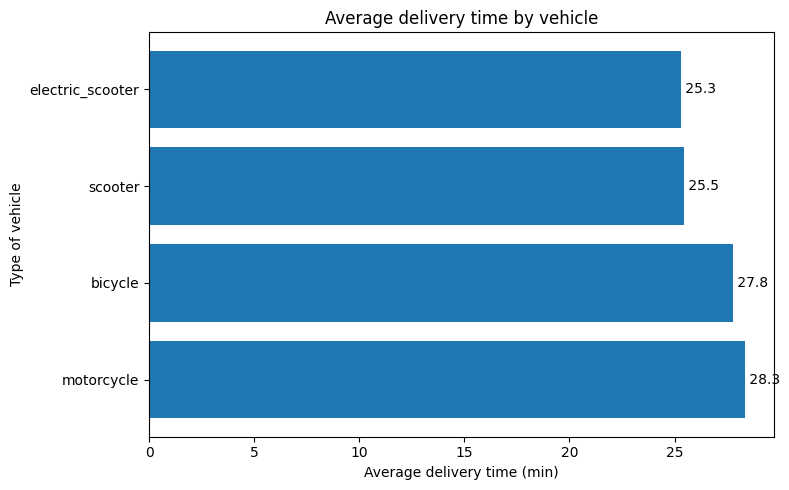

In [ ]:
#chart for average minutes for each ride in differ city
plot_df = type_minutes.sort_values('Avg_minutes', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(plot_df['Type_of_vehicle'], plot_df['Avg_minutes'])
plt.xlabel('Average delivery time (min)')
plt.ylabel('Type of vehicle')
plt.title('Average delivery time by vehicle')
# value labels
for i, v in enumerate(plot_df['Avg_minutes']):
    plt.text(v, i, f' {v:.1f}', va='center')
plt.tight_layout()
plt.show()

- Electric, and Convesional scooter have slightly different gap ini average of minutes
- Bicycle more efficeient in time than motorcycle

## 3. Which one of vehicle that can take alot multiple delivery?

In [ ]:
#alter values in column multiple order
data_metropolitan['multiple_deliveries'] = data_metropolitan['multiple_deliveries'].replace(
    {0:1, 1:2, 2:3, 3:4}
).astype('Int64')

/tmp/ipython-input-626417942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_metropolitan['multiple_deliveries'] = data_metropolitan['multiple_deliveries'].replace(


In [ ]:
#total delivered order by vehicle
avg_delivered =(
    data_metropolitan
      .groupby('Type_of_vehicle')
      .agg(
          Total_Order = ('Delivery_person_ID', 'count'),
          Total_Delivered = ('multiple_deliveries', 'sum'),
          AVG_Delivered = ('multiple_deliveries', 'mean'))
)
avg_delivered['Percentage'] = ((avg_delivered['Total_Delivered']/avg_delivered['Total_Order'])*100).round(2)
avg_delivered = avg_delivered.reset_index().sort_values(by = 'Percentage', ascending = False)
avg_delivered

,Type_of_vehicle,Total_Order,Total_Delivered,AVG_Delivered,Percentage
2,motorcycle,20697,37271,1.800792,180.08
0,bicycle,55,97,1.763636,176.36
1,electric_scooter,2936,5070,1.726839,172.68
3,scooter,11599,19949,1.71989,171.99


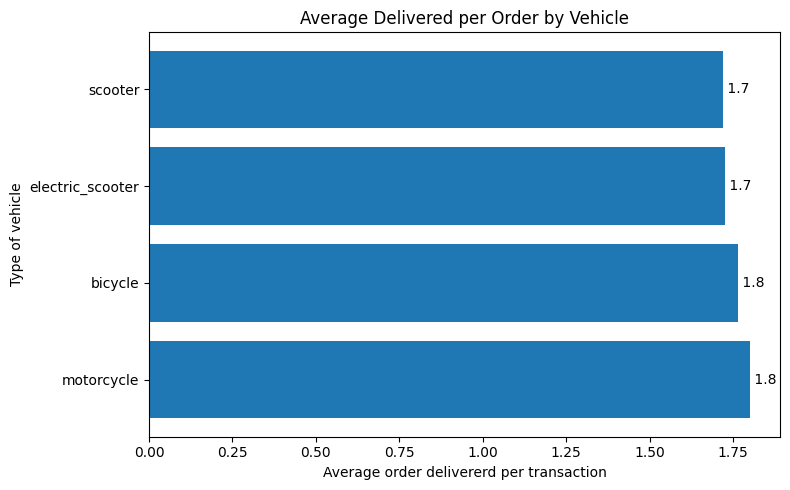

In [ ]:
#chart percentage of total delivered
plt.figure(figsize=(8,5))
plt.barh(avg_delivered['Type_of_vehicle'], avg_delivered['AVG_Delivered'])
plt.xlabel('Average order delivererd per transaction')
plt.ylabel('Type of vehicle')
plt.title('Average Delivered per Order by Vehicle')
# value labels
for i, v in enumerate(avg_delivered['AVG_Delivered']):
    plt.text(v, i, f' {v:.1f}', va='center')
plt.tight_layout()
plt.show()

- Motocycle is the best eficient vehicle to delivered multiple stuff, arround 1.8 per order
- Scooter, and electric scooter not quite efficient to drlivered multiple orders like Bicycle

## 4. Wheter order delivery time depends on weather?

In [ ]:
#average minutes for each ride in different city
weather_motor = (
    data_metropolitan
      .groupby(['Type_of_vehicle', 'Weather_conditions'], as_index = False)
      .agg(
        Total_minutes = ('Time_taken (min)', 'sum'),
        Avg_minutes = ('Time_taken (min)', 'mean')
        )
        .sort_values(by = 'Type_of_vehicle', ascending = False)
)
weather_motor

,Type_of_vehicle,Weather_conditions,Total_minutes,Avg_minutes
18,scooter,Windy,46686,24.494229
17,scooter,Sunny,34259,20.176090
16,scooter,Stormy,47780,24.692506
15,scooter,Sandstorms,47815,24.774611
14,scooter,Fog,61651,28.568582
13,scooter,Cloudy,57161,28.986308
10,motorcycle,Stormy,96545,27.862915
12,motorcycle,Windy,97615,28.294203
11,motorcycle,Sunny,77238,24.227729
9,motorcycle,Sandstorms,96275,28.150585


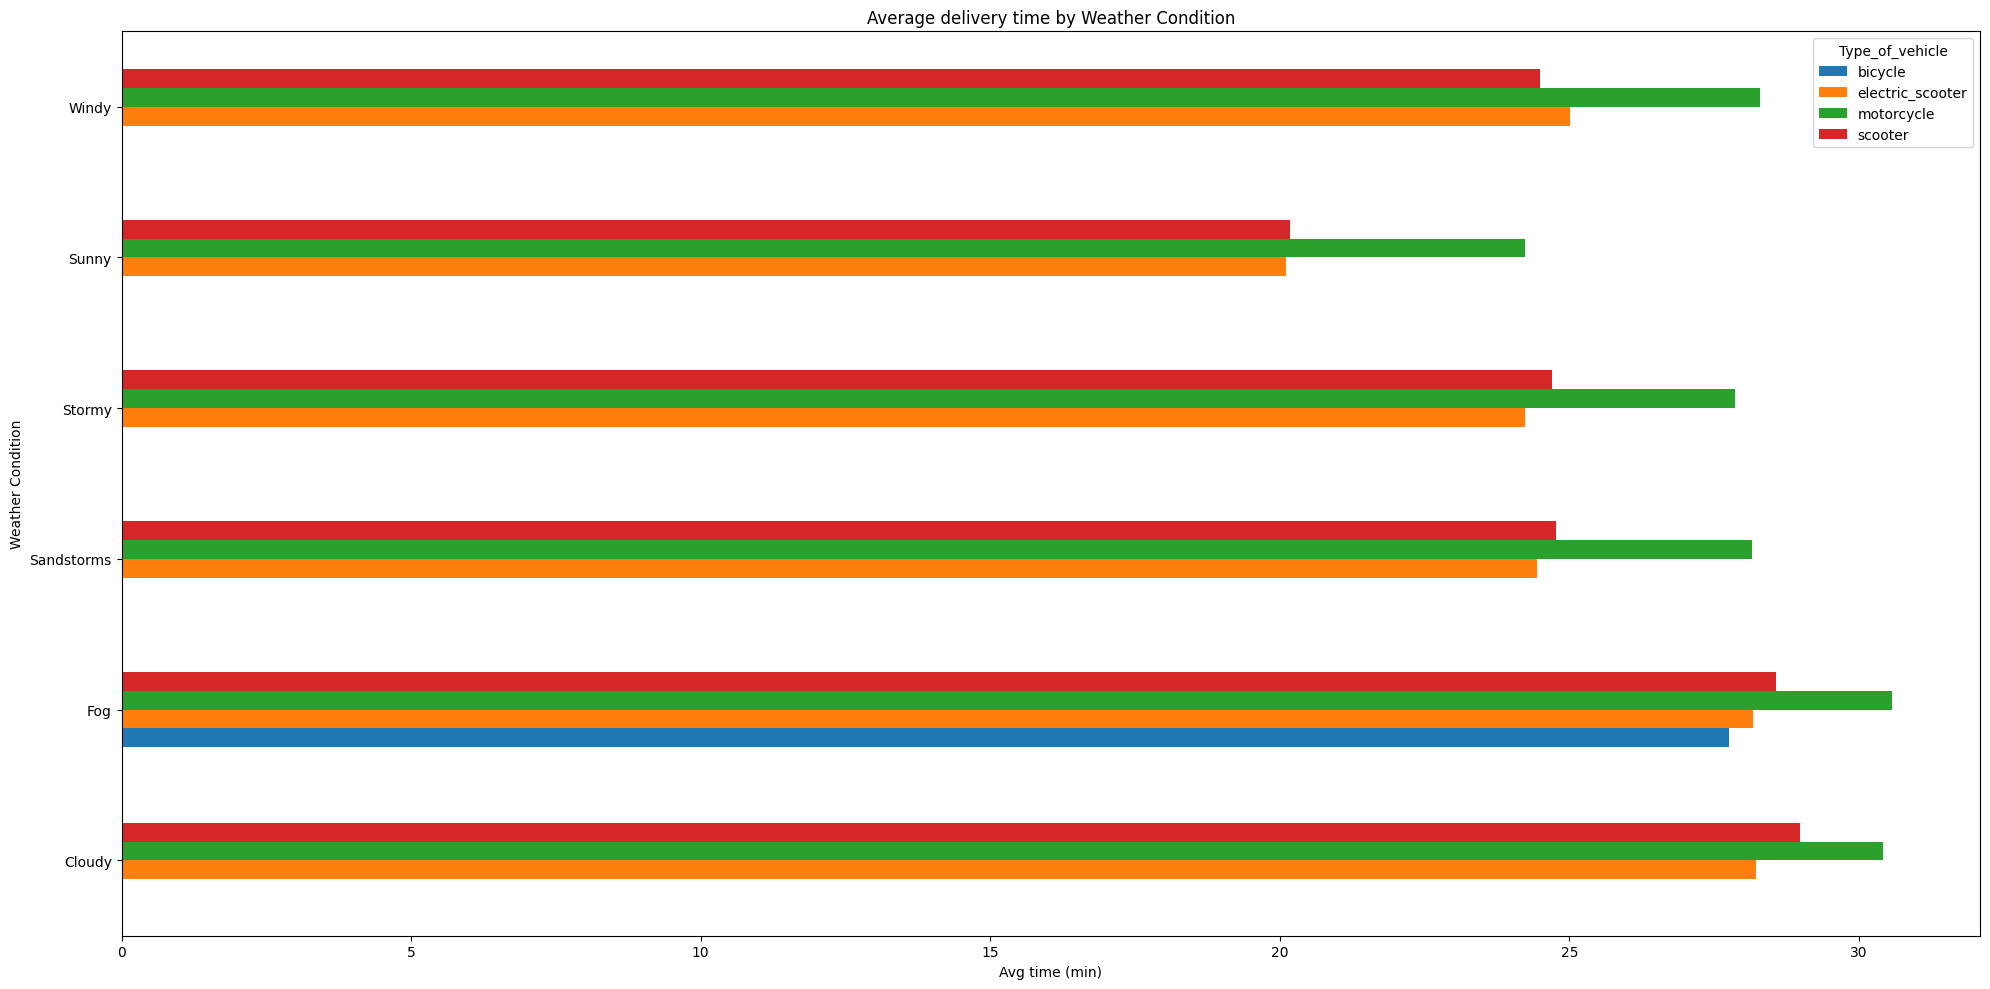

In [ ]:
#chart for average minutes for each ride in differ city
weather_list = (weather_motor.groupby('Weather_conditions')['Total_minutes']
              .sum().index)

plot_df = (weather_motor[weather_motor['Weather_conditions'].isin(weather_list)]
           .pivot(index='Weather_conditions', columns='Type_of_vehicle', values='Avg_minutes')
           .fillna(0))

ax = plot_df.plot(kind='barh', figsize=(20,10))
ax.set_xlabel('Avg time (min)')
ax.set_ylabel('Weather Condition')
ax.set_title('Average delivery time by Weather Condition')
plt.tight_layout()
plt.show()

- Bicycle have the most efficient vehicle in fog situation
- At fog weather all of vehicle get more time to delivered order
- Motorcycle in every weather have the longest time to delivered order
- Electric scooter became the most fastest ride in every conditions

## 5. Which the most efficient vehicle when it comes to high traffic?

In [ ]:
#average minutes for each ride in different city
trafic_vehicle = (
    data_metropolitan
      .groupby(['Type_of_vehicle', 'Road_traffic_density'], as_index = False)
      .agg(
        Total_minutes = ('Time_taken (min)', 'sum'),
        Avg_minutes = ('Time_taken (min)', 'mean')
        )
        .sort_values(by = 'Type_of_vehicle', ascending = False)
)

trafic_vehicle

,Type_of_vehicle,Road_traffic_density,Total_minutes,Avg_minutes
9,scooter,High,29213,25.967111
10,scooter,Jam,112272,29.568607
11,scooter,Low,81174,21.111573
12,scooter,Medium,72693,25.668432
5,motorcycle,High,60536,29.329457
6,motorcycle,Jam,221750,33.355897
7,motorcycle,Low,158721,22.886950
8,motorcycle,Medium,145413,28.794653
1,electric_scooter,High,7108,26.036630
2,electric_scooter,Jam,27185,29.137192


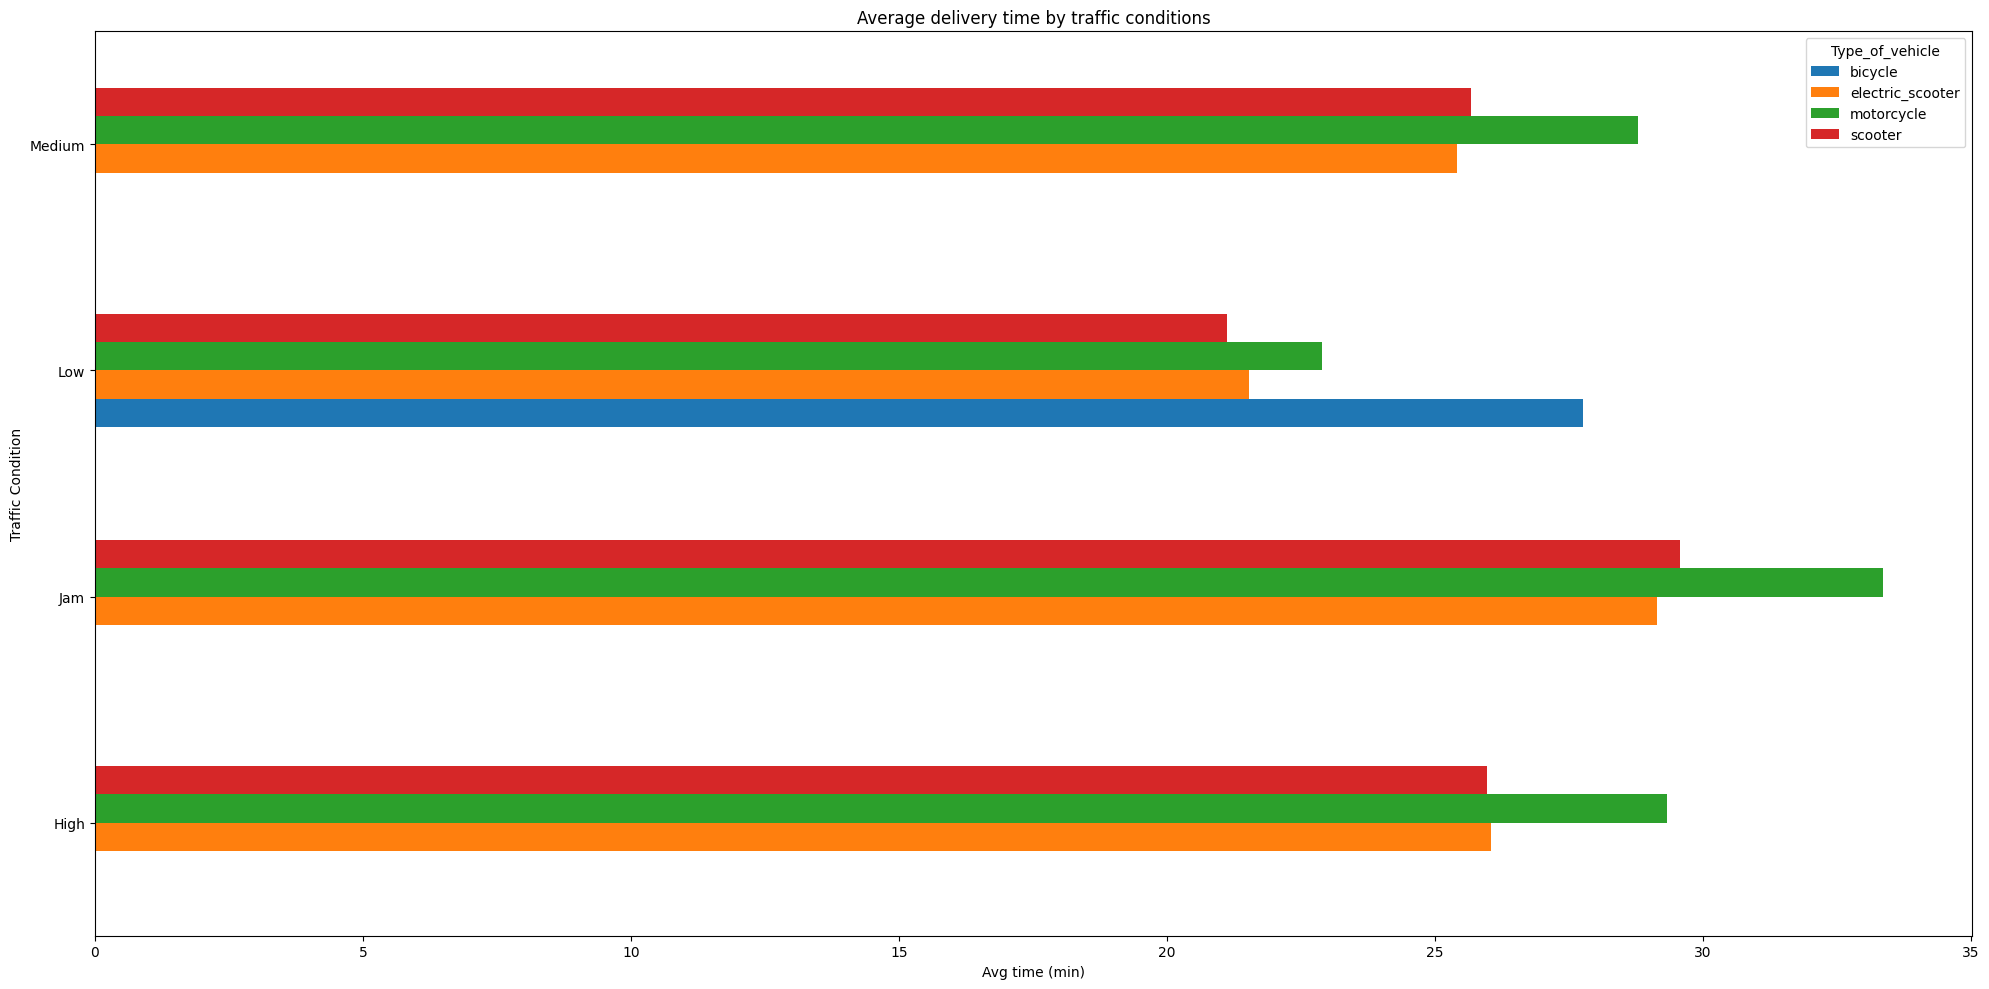

In [ ]:
#chart for average minutes for each ride in few traffic conditions
traffic_list = (trafic_vehicle.groupby('Road_traffic_density')['Total_minutes']
              .sum().index)

plot_df = (trafic_vehicle[trafic_vehicle['Road_traffic_density'].isin(traffic_list)]
           .pivot(index='Road_traffic_density', columns='Type_of_vehicle', values='Avg_minutes')
           .fillna(0))

ax = plot_df.plot(kind='barh', figsize=(20,10))
ax.set_xlabel('Avg time (min)')
ax.set_ylabel('Traffic Condition')
ax.set_title('Average delivery time by traffic conditions')
plt.tight_layout()
plt.show()

- Scooter, and eletric scooter have the most efficent vehicle during high traffic
- Motorcycle became the worst vehicle during high trafic, but doesn't have huge gap with scooter
- Bicycle have the worst delivery time when it comes to low traffic
- In the low traffic condition scooter have the most efficient of time, than ellectric scooter

##6. Whether condition of vehicle impacted towards delivery time?

In [ ]:
#average minutes for each ride in different city
status_vehicle = (
    data_metropolitan
      .groupby(['Type_of_vehicle', 'Vehicle_condition'], as_index = False)
      .agg(
        Total_minutes = ('Time_taken (min)', 'sum'),
        Avg_minutes = ('Time_taken (min)', 'mean')
        )
        .sort_values(by = 'Type_of_vehicle', ascending = False)
)
condition_vehicle = status_vehicle.sort_values(by = 'Avg_minutes', ascending = True)
condition_vehicle

,Type_of_vehicle,Vehicle_condition,Total_minutes,Avg_minutes
1,electric_scooter,2,70254,25.189674
4,motorcycle,1,145330,25.274783
5,motorcycle,2,71790,25.295983
7,scooter,1,142435,25.439364
8,scooter,2,149127,25.448294
9,scooter,3,3790,27.071429
2,electric_scooter,3,3985,27.108844
6,motorcycle,3,2163,27.730769
0,bicycle,3,1527,27.763636
3,motorcycle,0,367137,30.515917


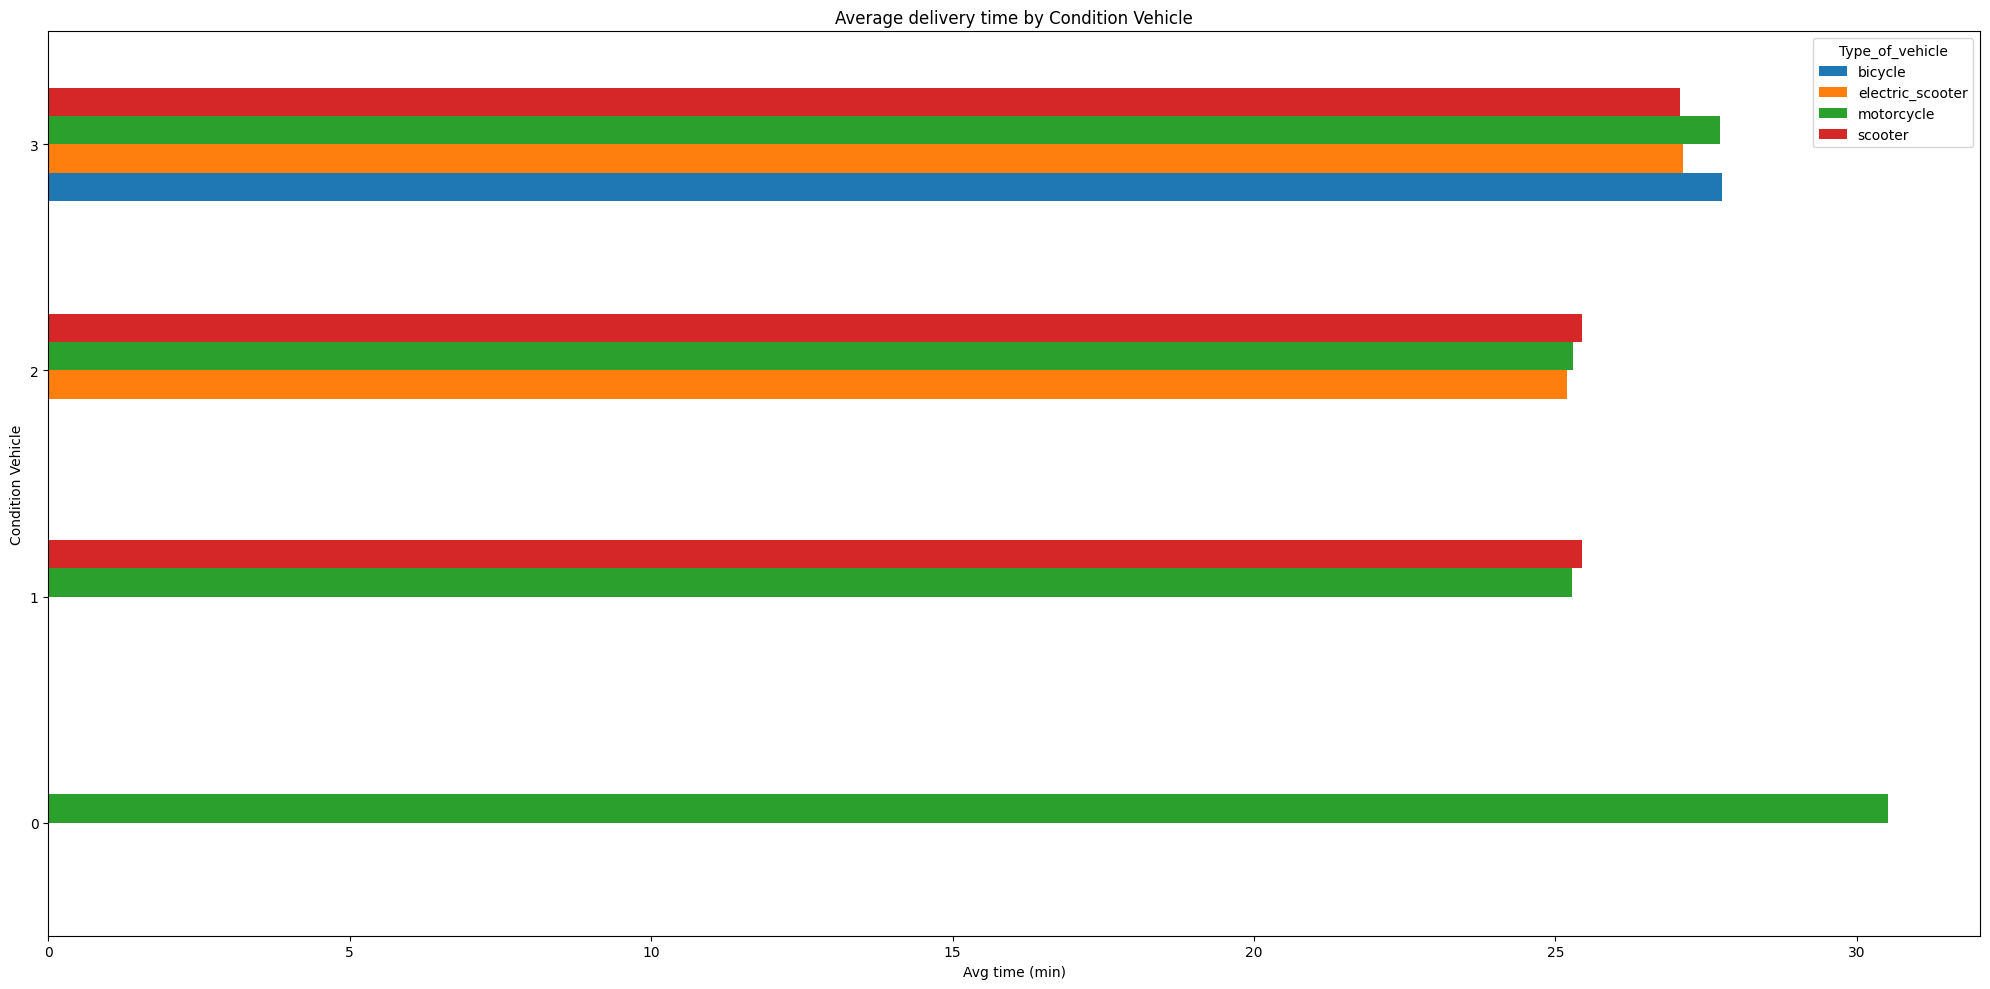

In [ ]:
#chart for average minutes for each ride in few traffic conditions
condition_list = (status_vehicle.groupby('Vehicle_condition')['Total_minutes']
              .sum().index)

plot_df = (status_vehicle[status_vehicle['Vehicle_condition'].isin(condition_list)]
           .pivot(index='Vehicle_condition', columns='Type_of_vehicle', values='Avg_minutes')
           .fillna(0))

ax = plot_df.plot(kind='barh', figsize=(20,10))
ax.set_xlabel('Avg time (min)')
ax.set_ylabel('Condition Vehicle')
ax.set_title('Average delivery time by Condition Vehicle')
plt.tight_layout()
plt.show()

- Bad vehicle condition significantly increases delivery time. Motorcycles in bad condition average 30.5 min

- Motorcycles and scooters in good/normal condition deliver in 25.3–25.4 min, which is very stable and efficien

# Download Clean File

In [ ]:
dowload data_usa
data_metropolitan.to_csv('data_metropolitan.csv', index=False)
from google.colab import files
files.download('data_metropolitan.csv')